In [ ]:
import pandas as pd
#Load in dataframes
weather_newark_2020 = pd.read_csv("hourly_weather_newark_2020.csv")
weather_newark_2021 = pd.read_csv("hourly_weather_newark_2021.csv")
weather_newark_2022 = pd.read_csv("hourly_weather_newark_2022.csv")
weather_newark_2023 = pd.read_csv("hourly_weather_newark_2023.csv")

#combining all the weather dataframes into one dataframe
weather_newark_2020_2023 = pd.concat([weather_newark_2020, weather_newark_2021, weather_newark_2022, weather_newark_2023])

#stays the same for all models
date_categories = pd.read_excel("Date_Catagories.xlsx")

In [ ]:
#removing na values
weather_newark_2020_2023 = weather_newark_2020_2023.dropna()
#view weather df 2020-2023
#weather_newark_2020_2023.tail(50)

In [ ]:
#Removing units from Temperature and DewPoint
temps = []
for i in weather_newark_2020_2023["Temperature"]:
    temps.append(i.split("F")[0])

weather_newark_2020_2023["Temperature"] = temps

dewpoint = []
for i in weather_newark_2020_2023["Dew Point"]:
    dewpoint.append(i.split("F")[0])

weather_newark_2020_2023["Dew Point"] = dewpoint

In [ ]:
#Removing units from Humidity
humidity = []
for i in weather_newark_2020_2023["Humidity"]:
    humidity.append(i.split("%")[0])

weather_newark_2020_2023["Humidity"] = humidity

In [ ]:
#Removing units from Wind Speed and Wind Gust
speeds = []
for i in weather_newark_2020_2023["Wind Speed"]:
    speeds.append(i.split("m")[0])

weather_newark_2020_2023["Wind Speed"] = speeds

gusts = []
for i in weather_newark_2020_2023["Wind Gust"]:
    gusts.append(i.split("m")[0])

weather_newark_2020_2023["Wind Gust"] = gusts

In [ ]:
#Removing units from Pressure and Precipitation
pressure = []
for i in weather_newark_2020_2023["Pressure"]:
    pressure.append(i.split("i")[0])

weather_newark_2020_2023["Pressure"] = pressure

percipitation = []
for i in weather_newark_2020_2023["Precipitation"]:
    percipitation.append(i.split("i")[0])

weather_newark_2020_2023["Precipitation"] = percipitation


In [ ]:
#viewing df with no units
weather_newark_2020_2023

Time Temperature Dew Point Humidity Wind Wind Speed  \
0           1/1/2020 1:51          40        28       63    W         14   
1           1/1/2020 2:51          39        29       67    W         14   
2           1/1/2020 3:51          39        28       65    W         10   
3           1/1/2020 4:51          39        26       60    W         12   
4           1/1/2020 5:51          38        26       62  WNW         13   
...                   ...         ...       ...      ...  ...        ...   
9924   2023-12-31 8:51 PM          43        27       53  WSW          6   
9925   2023-12-31 9:51 PM          43        28       56    W          8   
9926  2023-12-31 10:51 PM          43        28       56   SW          7   
9927  2023-12-31 11:51 PM          43        29       58  WSW          7   
9928  2023-12-31 12:51 AM          42        29       60   SW          9   

     Wind Gust Pressure Precipitation      Condition  
0            0    29.64           0.0         Cloudy  
1            0    29.65           0.0  Mostly Cloudy  
2            0    29.66           0.0         Cloudy  
3            0    29.67           0.0  Mostly Cloudy  
4            0    29.68           0.0     Light Snow  
...        ...      ...           ...            ...  
9924         0    30.00           0.0         Cloudy  
9925         0    30.00           0.0         Cloudy  
9926         0    29.99           0.0         Cloudy  
9927         0    30.00           0.0         Cloudy  
9928         0    30.00           0.0         Cloudy  

[39750 rows x 10 columns]

In [ ]:
#remove wind column
weather_newark_2020_2023 = weather_newark_2020_2023.drop(columns = "Wind")


In [ ]:
#reformatting to use pd.to_datetime
date = []
for i in weather_newark_2020_2023["Time"]:
    if "-" in i:
        year = i.split("-")[0]
        month = i.split("-")[1]
        day = i.split("-")[2][:2]
        time = i.split("-")[2][3:]

        if "AM" in time and time[:2] == "12":
            time = "00" + time[2:5]
        elif "AM" in time:
            time = time[:-3]
        elif "PM" in time and ":" in time[0:2]:
            time =  str(int(time[0]) + 12) + time[1:-3]
        elif "PM" in time and time[:2] == "12":
            time =  time[:-3]
        elif "PM" in time:
            time =  str(int(time[0:2]) + 12) + time[2:-3]

        time = time[:-2]
        time = time + "00"

        if len(month) == 1 and len(day) == 1:
            date.append("0" + month + "/" + "0" + day + "/" + year + " " + time)
        if len(month) == 2 and len(day) == 1:
            date.append(month + "/" + "0" + day + "/" + year + " " + time)
        if len(month) == 1 and len(day) == 2:
            date.append("0" + month + "/" + day + "/" + year + " " + time)
        if len(month) == 2 and len(day) == 2:
            date.append(month + "/" + day + "/" + year + " " + time)

    else:
        time = i.split("/")[2][4:]
        time = time.split(":")[0] + ":" + "00"
        i = i.split(" ")[0] + " " + time
        date.append(i)

weather_newark_2020_2023["Time"] = date
weather_newark_2020_2023

Time Temperature Dew Point Humidity Wind Speed Wind Gust  \
0       1/1/2020  1:00          40        28       63         14         0   
1       1/1/2020  2:00          39        29       67         14         0   
2       1/1/2020  3:00          39        28       65         10         0   
3       1/1/2020  4:00          39        26       60         12         0   
4       1/1/2020  5:00          38        26       62         13         0   
...                ...         ...       ...      ...        ...       ...   
9924  12/31/2023 20:00          43        27       53          6         0   
9925  12/31/2023 21:00          43        28       56          8         0   
9926  12/31/2023 22:00          43        28       56          7         0   
9927  12/31/2023 23:00          43        29       58          7         0   
9928  12/31/2023 00:00          42        29       60          9         0   

     Pressure Precipitation      Condition  
0       29.64           0.0         Cloudy  
1       29.65           0.0  Mostly Cloudy  
2       29.66           0.0         Cloudy  
3       29.67           0.0  Mostly Cloudy  
4       29.68           0.0     Light Snow  
...       ...           ...            ...  
9924    30.00           0.0         Cloudy  
9925    30.00           0.0         Cloudy  
9926    29.99           0.0         Cloudy  
9927    30.00           0.0         Cloudy  
9928    30.00           0.0         Cloudy  

[39750 rows x 9 columns]

In [ ]:
#binary for condition
weather_newark_2020_2023 = pd.get_dummies(weather_newark_2020_2023, columns=['Condition'], prefix = "Condition", dtype = int)

In [ ]:
#weather_newark_2020_2023.dtypes

import numpy as np

weather_newark_2020_2023['Temperature'] = pd.to_numeric(weather_newark_2020_2023['Temperature'])
weather_newark_2020_2023['Dew Point'] = pd.to_numeric(weather_newark_2020_2023['Dew Point'])
weather_newark_2020_2023['Humidity'] = pd.to_numeric(weather_newark_2020_2023['Humidity'])
weather_newark_2020_2023['Wind Speed'] = pd.to_numeric(weather_newark_2020_2023['Wind Speed'])
weather_newark_2020_2023['Wind Gust'] = pd.to_numeric(weather_newark_2020_2023['Wind Gust'])
weather_newark_2020_2023['Pressure'] = pd.to_numeric(weather_newark_2020_2023['Pressure'])
weather_newark_2020_2023['Precipitation'] = pd.to_numeric(weather_newark_2020_2023['Precipitation'])

weather_newark_2020_2023_mean = weather_newark_2020_2023.groupby(['Time']).agg({'Temperature': np.mean, 'Dew Point': np.mean, 'Humidity': np.mean, 'Wind Speed': np.mean, 'Wind Gust': np.mean, 'Pressure': np.mean, 'Precipitation': np.mean,
                                                                           'Condition_Cloudy': np.max, 'Condition_Mostly Cloudy': np.max, 'Condition_Light Snow': np.max, 'Condition_Mostly Cloudy / Windy': np.max,
                                                                           'Condition_Cloudy / Windy': np.max, 'Condition_Fair': np.max, 'Condition_Partly Cloudy': np.max, 'Condition_Light Rain': np.max,
                                                                           'Condition_Light Drizzle': np.max, 'Condition_Rain': np.max, 'Condition_Fog': np.max, 'Condition_Wintry Mix': np.max, 'Condition_Partly Cloudy / Windy': np.max,
                                                                           'Condition_Fair / Windy': np.max, 'Condition_Light Snow / Windy': np.max, 'Condition_Light Rain / Windy': np.max, 'Condition_Wintry Mix / Windy': np.max, 'Condition_Light Snow and Sleet': np.max,
                                                                           'Condition_Rain / Windy': np.max, 'Condition_Heavy Rain': np.max, 'Condition_Haze': np.max, 'Condition_Drizzle and Fog': np.max, 'Condition_Heavy Rain / Windy': np.max,
                                                                           'Condition_T-Storm / Windy': np.max, 'Condition_Light Rain with Thunder': np.max, 'Condition_Heavy T-Storm / Windy': np.max, 'Condition_Heavy T-Storm': np.max, 'Condition_Light Sleet': np.max,
                                                                           'Condition_Thunder': np.max, 'Condition_T-Storm': np.max, 'Condition_Thunder in the Vicinity': np.max, 'Condition_Thunder / Windy': np.max, 'Condition_Snow': np.max,
                                                                           'Condition_Snow / Windy': np.max, 'Condition_Heavy Snow / Windy': np.max, 'Condition_Snow and Sleet / Windy': np.max, 'Condition_Snow and Sleet': np.max, 'Condition_Heavy Snow': np.max,
                                                                           'Condition_Light Freezing Rain': np.max, 'Condition_Light Freezing Drizzle': np.max, 'Condition_Squalls / Windy': np.max, 'Condition_Blowing Snow / Windy': np.max, 'Condition_Light Snow and Sleet / Windy': np.max,
                                                                           'Condition_Haze / Windy': np.max, 'Condition_Smoke': np.max, 'Condition_Mist': np.max, 'Condition_Light Drizzle / Windy': np.max})
weather_newark_2020_2023 = weather_newark_2020_2023_mean.reset_index()
weather_newark_2020_2023.head()

<ipython-input-59-126243fb61a4>:13: FutureWarning: The provided callable <function mean at 0x7c8a666295a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  weather_newark_2020_2023_mean = weather_newark_2020_2023.groupby(['Time']).agg({'Temperature': np.mean, 'Dew Point': np.mean, 'Humidity': np.mean, 'Wind Speed': np.mean, 'Wind Gust': np.mean, 'Pressure': np.mean, 'Precipitation': np.mean,
<ipython-input-59-126243fb61a4>:13: FutureWarning: The provided callable <function mean at 0x7c8a666295a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  weather_newark_2020_2023_mean = weather_newark_2020_2023.groupby(['Time']).agg({'Temperature': np.mean, 'Dew Point': np.mean, 'Humidity': np.mean, 'Wind Speed': np.mean, 'Wind Gust': np.mean, 'Pressu

Time  Temperature  Dew Point  Humidity  Wind Speed  Wind Gust  \
0  01/01/2022 00:00         52.0       52.0     100.0         8.0        0.0   
1  01/01/2022 10:00         51.5       50.5      96.5         8.5        0.0   
2  01/01/2022 11:00         53.0       52.0      96.0        12.0        0.0   
3  01/01/2022 12:00         53.5       53.0      98.5         9.5        0.0   
4  01/01/2022 13:00         55.0       54.0      96.0         8.0        0.0   

   Pressure  Precipitation  Condition_Cloudy  Condition_Mostly Cloudy  ...  \
0    29.530            0.0                 0                        0  ...   
1    29.825            0.0                 0                        0  ...   
2    29.780            0.0                 0                        0  ...   
3    29.765            0.0                 0                        0  ...   
4    29.740            0.0                 0                        0  ...   

   Condition_Heavy Snow  Condition_Light Freezing Rain  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
3                     0                              0   
4                     0                              0   

   Condition_Light Freezing Drizzle  Condition_Squalls / Windy  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   

   Condition_Blowing Snow / Windy  Condition_Light Snow and Sleet / Windy  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

   Condition_Haze / Windy  Condition_Smoke  Condition_Mist  \
0                       0                0               0   
1                       0                0               0   
2                       0                0               0   
3                       0                0               0   
4                       0                0               0   

   Condition_Light Drizzle / Windy  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 55 columns]

In [ ]:
weather_newark_2020_2023.dtypes


Time                                       object
Temperature                               float64
Dew Point                                 float64
Humidity                                  float64
Wind Speed                                float64
Wind Gust                                 float64
Pressure                                  float64
Precipitation                             float64
Condition_Cloudy                            int64
Condition_Mostly Cloudy                     int64
Condition_Light Snow                        int64
Condition_Mostly Cloudy / Windy             int64
Condition_Cloudy / Windy                    int64
Condition_Fair                              int64
Condition_Partly Cloudy                     int64
Condition_Light Rain                        int64
Condition_Light Drizzle                     int64
Condition_Rain                              int64
Condition_Fog                               int64
Condition_Wintry Mix                        int64
Condition_Partly Cloudy / Windy             int64
Condition_Fair / Windy                      int64
Condition_Light Snow / Windy                int64
Condition_Light Rain / Windy                int64
Condition_Wintry Mix / Windy                int64
Condition_Light Snow and Sleet              int64
Condition_Rain / Windy                      int64
Condition_Heavy Rain                        int64
Condition_Haze                              int64
Condition_Drizzle and Fog                   int64
Condition_Heavy Rain / Windy                int64
Condition_T-Storm / Windy                   int64
Condition_Light Rain with Thunder           int64
Condition_Heavy T-Storm / Windy             int64
Condition_Heavy T-Storm                     int64
Condition_Light Sleet                       int64
Condition_Thunder                           int64
Condition_T-Storm                           int64
Condition_Thunder in the Vicinity           int64
Condition_Thunder / Windy                   int64
Condition_Snow                              int64
Condition_Snow / Windy                      int64
Condition_Heavy Snow / Windy                int64
Condition_Snow and Sleet / Windy            int64
Condition_Snow and Sleet                    int64
Condition_Heavy Snow                        int64
Condition_Light Freezing Rain               int64
Condition_Light Freezing Drizzle            int64
Condition_Squalls / Windy                   int64
Condition_Blowing Snow / Windy              int64
Condition_Light Snow and Sleet / Windy      int64
Condition_Haze / Windy                      int64
Condition_Smoke                             int64
Condition_Mist                              int64
Condition_Light Drizzle / Windy             int64
dtype: object

In [ ]:
#Changing time to date time with pandas
weather_newark_2020_2023["Date"] = weather_newark_2020_2023["Time"].str.split(" ").str[0]
weather_newark_2020_2023["Time"] = pd.to_datetime(weather_newark_2020_2023["Time"])

weather_newark_2020_2023.head(30)

Time  Temperature  Dew Point  Humidity  Wind Speed  \
0  2022-01-01 00:00:00    52.000000  52.000000     100.0    8.000000   
1  2022-01-01 10:00:00    51.500000  50.500000      96.5    8.500000   
2  2022-01-01 11:00:00    53.000000  52.000000      96.0   12.000000   
3  2022-01-01 12:00:00    53.500000  53.000000      98.5    9.500000   
4  2022-01-01 13:00:00    55.000000  54.000000      96.0    8.000000   
5  2022-01-01 14:00:00    55.000000  54.000000      96.0    5.000000   
6  2022-01-01 15:00:00    55.000000  54.000000      96.0    6.000000   
7  2022-01-01 16:00:00    55.000000  54.000000      96.0    6.000000   
8  2022-01-01 17:00:00    55.000000  54.000000      96.0    5.000000   
9  2022-01-01 18:00:00    55.000000  54.000000      96.0    0.000000   
10 2022-01-01 19:00:00    54.000000  53.000000      97.0    3.000000   
11 2022-01-01 01:00:00    50.000000  48.500000      94.5    6.000000   
12 2022-01-01 20:00:00    54.000000  53.666667      99.0    1.000000   
13 2022-01-01 21:00:00    53.666667  53.666667     100.0    3.333333   
14 2022-01-01 22:00:00    53.000000  53.000000     100.0    8.000000   
15 2022-01-01 23:00:00    53.000000  53.000000     100.0   11.000000   
16 2022-01-01 02:00:00    50.000000  49.000000      96.0    0.000000   
17 2022-01-01 03:00:00    50.000000  48.000000      93.0    5.000000   
18 2022-01-01 04:00:00    50.000000  49.000000      96.0    6.000000   
19 2022-01-01 05:00:00    50.000000  49.000000      96.0    0.000000   
20 2022-01-01 06:00:00    49.500000  49.000000      98.0    0.000000   
21 2022-01-01 07:00:00    50.000000  50.000000     100.0    0.000000   
22 2022-01-01 08:00:00    50.000000  49.000000      96.0    3.000000   
23 2022-01-01 09:00:00    50.000000  50.000000     100.0    4.500000   
24 2023-01-01 00:00:00    48.000000  37.000000      66.0    3.000000   
25 2023-01-01 10:00:00    54.000000  43.000000      66.0   12.000000   
26 2023-01-01 11:00:00    55.000000  41.000000      59.0   15.000000   
27 2023-01-01 12:00:00    56.000000  38.000000      51.0    9.000000   
28 2023-01-01 13:00:00    56.000000  35.000000      45.0   18.000000   
29 2023-01-01 14:00:00    57.000000  33.000000      40.0   12.000000   

    Wind Gust   Pressure  Precipitation  Condition_Cloudy  \
0         0.0  29.530000       0.000000                 0   
1         0.0  29.825000       0.000000                 0   
2         0.0  29.780000       0.000000                 0   
3         0.0  29.765000       0.000000                 0   
4         0.0  29.740000       0.000000                 0   
5         0.0  29.720000       0.000000                 0   
6         0.0  29.690000       0.000000                 1   
7         0.0  29.680000       0.000000                 1   
8         0.0  29.690000       0.000000                 0   
9         0.0  29.690000       0.000000                 0   
10        0.0  29.690000       0.000000                 0   
11        0.0  29.890000       0.000000                 1   
12        0.0  29.673333       0.066667                 0   
13        0.0  29.636667       0.000000                 0   
14        0.0  29.600000       0.100000                 0   
15        0.0  29.593333       0.200000                 0   
16        0.0  29.880000       0.000000                 0   
17        0.0  29.860000       0.000000                 0   
18        0.0  29.840000       0.000000                 0   
19        0.0  29.830000       0.000000                 0   
20        0.0  29.815000       0.000000                 1   
21        0.0  29.810000       0.000000                 0   
22        0.0  29.800000       0.000000                 0   
23        0.0  29.810000       0.000000                 0   
24        0.0  30.010000       0.000000                 1   
25        0.0  29.910000       0.000000                 0   
26        0.0  29.930000       0.000000                 0   
27        0.0  29.910000       0.000000                 0   
28        0.0  2

In [ ]:
#merging date_categories and weather data together by date
weather_newark_2020_2023["Date"] = pd.to_datetime(weather_newark_2020_2023["Date"])
date_categories["Date"] = pd.to_datetime(date_categories["Date"])
weather_dateCategories_newark_2020_2023 = pd.merge(weather_newark_2020_2023, date_categories, on = "Date")

#remove rows with NaN values
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.dropna()

weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.sort_values(by = "Time")

#view df
#This dataset is the weather data for newark from 2020-2023 and the date category data for each of the dates
weather_dateCategories_newark_2020_2023.head(30)

Time  Temperature  Dew Point  Humidity  Wind Speed  \
13031 2020-01-01 00:00:00         29.0       19.0      67.0         7.0   
13042 2020-01-01 01:00:00         40.0       28.0      63.0        14.0   
13047 2020-01-01 02:00:00         39.0       29.0      67.0        14.0   
13048 2020-01-01 03:00:00         39.0       28.0      65.0        10.0   
13049 2020-01-01 04:00:00         39.0       26.0      60.0        12.0   
13050 2020-01-01 05:00:00         38.0       26.0      62.0        13.0   
13051 2020-01-01 06:00:00         36.0       28.5      74.5         8.5   
13052 2020-01-01 07:00:00         37.0       25.5      63.5        12.0   
13053 2020-01-01 08:00:00         37.0       24.0      59.0        12.0   
13054 2020-01-01 09:00:00         38.0       22.0      53.0        15.0   
13032 2020-01-01 10:00:00         39.0       20.0      46.0        17.0   
13033 2020-01-01 11:00:00         40.0       20.0      45.0        20.0   
13034 2020-01-01 12:00:00         40.0       19.0      43.0        18.0   
13035 2020-01-01 13:00:00         40.0       18.0      41.0        22.0   
13036 2020-01-01 14:00:00         39.0       18.0      43.0        20.0   
13037 2020-01-01 15:00:00         39.0       18.0      43.0        21.0   
13038 2020-01-01 16:00:00         39.0       19.0      45.0        17.0   
13039 2020-01-01 17:00:00         38.0       20.0      48.0        16.0   
13040 2020-01-01 18:00:00         38.0       20.0      48.0        13.0   
13041 2020-01-01 19:00:00         37.0       20.0      50.0        15.0   
13043 2020-01-01 20:00:00         36.0       19.0      50.0        15.0   
13044 2020-01-01 21:00:00         35.0       19.0      52.0         8.0   
13045 2020-01-01 22:00:00         34.0       19.0      54.0         6.0   
13046 2020-01-01 23:00:00         30.0       19.0      64.0         6.0   
13559 2020-01-02 00:00:00         44.0       34.0      68.0         3.0   
13570 2020-01-02 01:00:00         27.0       18.0      69.0         6.0   
13574 2020-01-02 02:00:00         29.0       21.0      72.0        10.0   
13575 2020-01-02 03:00:00         28.0       20.0      72.0         7.0   
13576 2020-01-02 04:00:00         27.0       20.0      75.0         6.0   
13577 2020-01-02 05:00:00         29.0       21.0      72.0         8.0   

       Wind Gust  Pressure  Precipitation  Condition_Cloudy  \
13031        0.0    29.900            0.0                 0   
13042        0.0    29.640            0.0                 1   
13047        0.0    29.650            0.0                 0   
13048        0.0    29.660            0.0                 1   
13049        0.0    29.670            0.0                 0   
13050        0.0    29.680            0.0                 0   
13051        0.0    29.695            0.0                 1   
13052       12.0    29.700            0.0                 1   
13053        0.0    29.710            0.0                 1   
13054       22.0    29.730            0.0                 1   
13032        0.0    29.750            0.0                 0   
13033       25.0    29.750            0.0                 0   
13034       30.0    29.740            0.0                 0   
13035       29.0    29.730            0.0                 0   
13036       26.0    29.730            0.0                 1   
13037       28.0    29.760            0.0                 0   
13038       24.0    29.780            0.0                 1   
13039       21.0    29.810            0.0                 0   
13040        0.0    29.830            0.0                 0   
13041        0.0    29.850            0.0                 0   
13043       20.0    29.870            0.0                 0   
13044        0.0    29.880            0.0                 0   
13045        0.0    29.890            0.0                 0   
13046        0.0    29.900            0.0                 0   
13559        0.0    29.820            0.0                 1   
13570        0.0    29.900            0.0                

In [ ]:
#RECO_CIEP_dataset = pd.read_excel("RECO_CIEP-Eligible_Hourly_Load_August_2024_Update.xlsb") #data already in MW
#RECO_RSCP_dataset = pd.read_excel("RECO_RSCP-Eligible_Hourly_Load_August_2024_Update.xlsb") #data already in MW

In [ ]:
from openpyxl import load_workbook

# Load the workbook to inspect sheet names
#wb = load_workbook("PSE&G_CIEP-Eligible_Hourly_Load_August_2024_Update.xlsx")
#print("Sheet Names in CIEP File:", wb.sheetnames)

#wb = load_workbook("PSE&G_RSCP-Eligible_Hourly_Load_August_2024_Update.xlsx")
#print("Sheet Names in RSCP File:", wb.sheetnames)

In [ ]:
!pip install pyxlsb

PSEG_CIEP_dataset = pd.read_excel("PSE&G_CIEP-Eligible_Hourly_Load_August_2024_Update.xlsb") #data already in MW
PSEG_RSCP_dataset = pd.read_excel("PSE&G_RSCP-Eligible_Hourly_Load_August_2024_Update.xlsb") #data already in MW

In [ ]:
# Cleaning PSEG_CIEP_dataset
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset.iloc[4:]  # Remove the first 4 rows
PSEG_CIEP_dataset_clean.columns = PSEG_CIEP_dataset_clean.iloc[0]  # Set the new header from the first row
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean[1:]  # Remove the now redundant header row
PSEG_CIEP_dataset_clean.columns = PSEG_CIEP_dataset_clean.columns.fillna("Date")  # Fill missing column names with "Date"

PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset.iloc[4:]  # Remove the first 4 rows
PSEG_RSCP_dataset_clean.columns = PSEG_RSCP_dataset_clean.iloc[0]  # Set the new header from the first row
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean[1:]  # Remove the now redundant header row
PSEG_RSCP_dataset_clean.columns = PSEG_RSCP_dataset_clean.columns.fillna("Date")  # Fill missing column names with "Date"

print(PSEG_RSCP_dataset_clean.head())

4   Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  ...  \
5  44348   2451   2273   2193   2163   2154   2196   2308   2482   2631  ...   
6  44349   2722   2513   2392   2317   2295   2326   2433   2606   2805  ...   
7  44350   2753   2568   2419   2347   2351   2411   2522   2765   3014  ...   
8  44351   3035   2840   2704   2654   2653   2698   2802   3029   3341  ...   
9  44352   3037   2846   2698   2583   2520   2460   2469   2589   2784  ...   

4 Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22 Hour 23  \
5    3221    3233    3381    3461    3466    3459    3488    3479    3269   
6    3672    3726    3741    3733    3720    3666    3623    3529    3303   
7    3549    3611    3686    3853    3928    3965    3946    3806    3584   
8    4194    4461    4272    3893    3864    3882    3819    3748    3580   
9    4823    5105    5410    5625    5653    5534    5357    5217    4882   

4 Hour 24  
5    3004  
6    3014  
7    3316  
8    331

In [ ]:
print(PSEG_CIEP_dataset_clean.head())


4   Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  ...  \
5  44348   1085   1124   1115   1123   1177   1248   1323   1389   1372  ...   
6  44349   1259   1259   1260   1265   1299   1343   1427   1508   1498  ...   
7  44350   1244   1235   1260   1271   1286   1353   1465   1547   1542  ...   
8  44351   1315   1347   1361   1357   1380   1443   1541   1668   1690  ...   
9  44352   1287   1261   1243   1251   1269   1275   1310   1367   1371  ...   

4 Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22 Hour 23  \
5    1391    1422    1481    1498    1499    1505    1509    1425    1340   
6    1558    1567    1521    1479    1437    1428    1459    1423    1331   
7    1541    1614    1648    1670    1657    1556    1487    1410    1374   
8    1582    1654    1546    1455    1518    1533    1482    1469    1400   
9    1384    1416    1427    1453    1486    1483    1476    1438    1368   

4 Hour 24  
5    1289  
6    1285  
7    1360  
8    134

In [ ]:
# Clean the PSEG_CIEP_dataset
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset.iloc[4:]  # Remove the first 4 rows
PSEG_CIEP_dataset_clean.columns = PSEG_CIEP_dataset_clean.iloc[0]  # Set the first row as column headers
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean[1:]  # Remove the now redundant header row
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean.reset_index(drop=True)  # Reset the index to start from 0
PSEG_CIEP_dataset_clean.columns = PSEG_CIEP_dataset_clean.columns.fillna("Date")  # Fill NaNs with "Date"

# Clean the PSEG_RSCP_dataset
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset.iloc[4:]  # Remove the first 4 rows
PSEG_RSCP_dataset_clean.columns = PSEG_RSCP_dataset_clean.iloc[0]  # Set the first row as column headers
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean[1:]  # Remove the now redundant header row
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean.reset_index(drop=True)  # Reset the index to start from 0
PSEG_RSCP_dataset_clean.columns = PSEG_RSCP_dataset_clean.columns.fillna("Date")  # Fill NaNs with "Date"

# Display the cleaned datasets to verify
print(PSEG_CIEP_dataset_clean.head())
print(PSEG_RSCP_dataset_clean.head())


4   Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  ...  \
0  44348   1085   1124   1115   1123   1177   1248   1323   1389   1372  ...   
1  44349   1259   1259   1260   1265   1299   1343   1427   1508   1498  ...   
2  44350   1244   1235   1260   1271   1286   1353   1465   1547   1542  ...   
3  44351   1315   1347   1361   1357   1380   1443   1541   1668   1690  ...   
4  44352   1287   1261   1243   1251   1269   1275   1310   1367   1371  ...   

4 Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22 Hour 23  \
0    1391    1422    1481    1498    1499    1505    1509    1425    1340   
1    1558    1567    1521    1479    1437    1428    1459    1423    1331   
2    1541    1614    1648    1670    1657    1556    1487    1410    1374   
3    1582    1654    1546    1455    1518    1533    1482    1469    1400   
4    1384    1416    1427    1453    1486    1483    1476    1438    1368   

4 Hour 24  
0    1289  
1    1285  
2    1360  
3    134

In [ ]:
PSEG_CIEP_dataset_clean

4      Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0     44348   1085   1124   1115   1123   1177   1248   1323   1389   1372   
1     44349   1259   1259   1260   1265   1299   1343   1427   1508   1498   
2     44350   1244   1235   1260   1271   1286   1353   1465   1547   1542   
3     44351   1315   1347   1361   1357   1380   1443   1541   1668   1690   
4     44352   1287   1261   1243   1251   1269   1275   1310   1367   1371   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1091  45439   1234   1233   1263   1254   1276   1307   1317   1347   1345   
1092  45440   1262   1237   1240   1272   1300   1376   1496   1555   1474   
1093  45441   1273   1241   1262   1282   1313   1332   1452   1513   1413   
1094  45442   1306   1292   1295   1303   1309   1348   1432   1482   1410   
1095  45443   1250   1229   1235   1234   1257   1322   1391   1450   1368   

4     ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0     ...    1391    1422    1481    1498    1499    1505    1509    1425   
1     ...    1558    1567    1521    1479    1437    1428    1459    1423   
2     ...    1541    1614    1648    1670    1657    1556    1487    1410   
3     ...    1582    1654    1546    1455    1518    1533    1482    1469   
4     ...    1384    1416    1427    1453    1486    1483    1476    1438   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
1091  ...    1416    1396    1436    1407    1416    1451    1448    1371   
1092  ...    1457    1489    1518    1553    1560    1508    1471    1402   
1093  ...    1445    1485    1552    1573    1562    1520    1503    1405   
1094  ...    1273    1352    1415    1452    1450    1466    1449    1415   
1095  ...    1271    1327    1402    1442    1487    1484    1444    1434   

4    Hour 23 Hour 24  
0       1340    1289  
1       1331    1285  
2       1374    1360  
3       1400    1343  
4       1368    1330  
...      ...     ...  
1091    1321    1269  
1092    1335    1299  
1093    1356    1310  
1094    1329    1291  
1095    1362    1270  

[1096 rows x 25 columns]

In [ ]:
PSEG_RSCP_dataset_clean

4      Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0     44348   2451   2273   2193   2163   2154   2196   2308   2482   2631   
1     44349   2722   2513   2392   2317   2295   2326   2433   2606   2805   
2     44350   2753   2568   2419   2347   2351   2411   2522   2765   3014   
3     44351   3035   2840   2704   2654   2653   2698   2802   3029   3341   
4     44352   3037   2846   2698   2583   2520   2460   2469   2589   2784   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1091  45439   3503   3262   3077   2986   2926   2940   2921   2893   2962   
1092  45440   3263   3062   2898   2789   2771   2823   2967   3110   3225   
1093  45441   3228   2976   2786   2658   2608   2633   2727   2870   2997   
1094  45442   2983   2773   2638   2547   2521   2587   2654   2777   2863   
1095  45443   2789   2599   2455   2395   2380   2401   2474   2584   2661   

4     ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0     ...    3221    3233    3381    3461    3466    3459    3488    3479   
1     ...    3672    3726    3741    3733    3720    3666    3623    3529   
2     ...    3549    3611    3686    3853    3928    3965    3946    3806   
3     ...    4194    4461    4272    3893    3864    3882    3819    3748   
4     ...    4823    5105    5410    5625    5653    5534    5357    5217   
...   ...     ...     ...     ...     ...     ...     ...     ...     ...   
1091  ...    4185    4025    4027    4078    4032    4022    4076    4062   
1092  ...    4105    4330    4584    4796    4857    4777    4527    4300   
1093  ...    3712    3902    4195    4383    4341    4242    4083    3857   
1094  ...    3023    3232    3470    3625    3692    3672    3661    3567   
1095  ...    3156    3315    3553    3781    3865    3833    3749    3621   

4    Hour 23 Hour 24  
0       3269    3004  
1       3303    3014  
2       3584    3316  
3       3580    3314  
4       4882    4532  
...      ...     ...  
1091    3823    3551  
1092    3967    3577  
1093    3581    3277  
1094    3344    3072  
1095    3419    3161  

[1096 rows x 25 columns]

In [ ]:
# Clean and adjust the PSEG_CIEP_dataset
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset.iloc[4:]  # Remove the first 4 rows
PSEG_CIEP_dataset_clean.columns = PSEG_CIEP_dataset_clean.iloc[0]  # Set the first row as column headers
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean[1:]  # Remove the now redundant header row
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean.reset_index(drop=True)  # Reset the index
PSEG_CIEP_dataset_clean.columns = PSEG_CIEP_dataset_clean.columns.fillna("Date")  # Fill NaNs with "Date"

# Ensure 'Date' column exists and convert it
date0 = pd.to_datetime("1/1/1900")
for i, row in PSEG_CIEP_dataset_clean.iterrows():
    if isinstance(row['Date'], str) and row['Date'].isdigit():
        daysSince = int(row['Date'])
        daysSince = daysSince - 2  # Adjust for starting date difference
        PSEG_CIEP_dataset_clean.at[i, 'Date'] = (date0 + timedelta(days=daysSince)).strftime("%Y-%m-%d")

# Clean and adjust the PSEG_RSCP_dataset
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset.iloc[4:]  # Remove the first 4 rows
PSEG_RSCP_dataset_clean.columns = PSEG_RSCP_dataset_clean.iloc[0]  # Set the first row as column headers
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean[1:]  # Remove the now redundant header row
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean.reset_index(drop=True)  # Reset the index
PSEG_RSCP_dataset_clean.columns = PSEG_RSCP_dataset_clean.columns.fillna("Date")  # Fill NaNs with "Date"

# Ensure 'Date' column exists and convert it
for i, row in PSEG_RSCP_dataset_clean.iterrows():
    if isinstance(row['Date'], str) and row['Date'].isdigit():
        daysSince = int(row['Date'])
        daysSince = daysSince - 2  # Adjust for starting date difference
        PSEG_RSCP_dataset_clean.at[i, 'Date'] = (date0 + timedelta(days=daysSince)).strftime("%Y-%m-%d")

# Display the cleaned datasets to verify the 'Date' column
print(PSEG_CIEP_dataset_clean.head())
print(PSEG_RSCP_dataset_clean.head())


4   Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  ...  \
0  44348   1085   1124   1115   1123   1177   1248   1323   1389   1372  ...   
1  44349   1259   1259   1260   1265   1299   1343   1427   1508   1498  ...   
2  44350   1244   1235   1260   1271   1286   1353   1465   1547   1542  ...   
3  44351   1315   1347   1361   1357   1380   1443   1541   1668   1690  ...   
4  44352   1287   1261   1243   1251   1269   1275   1310   1367   1371  ...   

4 Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22 Hour 23  \
0    1391    1422    1481    1498    1499    1505    1509    1425    1340   
1    1558    1567    1521    1479    1437    1428    1459    1423    1331   
2    1541    1614    1648    1670    1657    1556    1487    1410    1374   
3    1582    1654    1546    1455    1518    1533    1482    1469    1400   
4    1384    1416    1427    1453    1486    1483    1476    1438    1368   

4 Hour 24  
0    1289  
1    1285  
2    1360  
3    134

In [ ]:
from datetime import timedelta
date0 = pd.to_datetime("1/1/1900")
for i, row in PSEG_RSCP_dataset_clean.iterrows():
    daysSince = int(row['Date'])
    daysSince = daysSince-2
    row['Date'] = (date0 + timedelta(days = daysSince)).strftime("%Y-%m-%d")

PSEG_RSCP_dataset_clean.head()

4        Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0  2021-06-01   2451   2273   2193   2163   2154   2196   2308   2482   2631   
1  2021-06-02   2722   2513   2392   2317   2295   2326   2433   2606   2805   
2  2021-06-03   2753   2568   2419   2347   2351   2411   2522   2765   3014   
3  2021-06-04   3035   2840   2704   2654   2653   2698   2802   3029   3341   
4  2021-06-05   3037   2846   2698   2583   2520   2460   2469   2589   2784   

4  ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0  ...    3221    3233    3381    3461    3466    3459    3488    3479   
1  ...    3672    3726    3741    3733    3720    3666    3623    3529   
2  ...    3549    3611    3686    3853    3928    3965    3946    3806   
3  ...    4194    4461    4272    3893    3864    3882    3819    3748   
4  ...    4823    5105    5410    5625    5653    5534    5357    5217   

4 Hour 23 Hour 24  
0    3269    3004  
1    3303    3014  
2    3584    3316  
3    3580    3314  
4    4882    4532  

[5 rows x 25 columns]

In [ ]:
from datetime import timedelta
date0 = pd.to_datetime("1/1/1900")
for i, row in PSEG_CIEP_dataset_clean.iterrows():
    daysSince = int(row['Date'])
    daysSince = daysSince-2
    row['Date'] = (date0 + timedelta(days = daysSince)).strftime("%Y-%m-%d")

PSEG_CIEP_dataset_clean.head()

4        Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0  2021-06-01   1085   1124   1115   1123   1177   1248   1323   1389   1372   
1  2021-06-02   1259   1259   1260   1265   1299   1343   1427   1508   1498   
2  2021-06-03   1244   1235   1260   1271   1286   1353   1465   1547   1542   
3  2021-06-04   1315   1347   1361   1357   1380   1443   1541   1668   1690   
4  2021-06-05   1287   1261   1243   1251   1269   1275   1310   1367   1371   

4  ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0  ...    1391    1422    1481    1498    1499    1505    1509    1425   
1  ...    1558    1567    1521    1479    1437    1428    1459    1423   
2  ...    1541    1614    1648    1670    1657    1556    1487    1410   
3  ...    1582    1654    1546    1455    1518    1533    1482    1469   
4  ...    1384    1416    1427    1453    1486    1483    1476    1438   

4 Hour 23 Hour 24  
0    1340    1289  
1    1331    1285  
2    1374    1360  
3    1400    1343  
4    1368    1330  

[5 rows x 25 columns]

In [ ]:
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean.reset_index(drop = True)
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean.reset_index(drop = True)
PSEG_RSCP_dataset_clean.head()
PSEG_CIEP_dataset_clean.head()

4        Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0  2021-06-01   1085   1124   1115   1123   1177   1248   1323   1389   1372   
1  2021-06-02   1259   1259   1260   1265   1299   1343   1427   1508   1498   
2  2021-06-03   1244   1235   1260   1271   1286   1353   1465   1547   1542   
3  2021-06-04   1315   1347   1361   1357   1380   1443   1541   1668   1690   
4  2021-06-05   1287   1261   1243   1251   1269   1275   1310   1367   1371   

4  ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0  ...    1391    1422    1481    1498    1499    1505    1509    1425   
1  ...    1558    1567    1521    1479    1437    1428    1459    1423   
2  ...    1541    1614    1648    1670    1657    1556    1487    1410   
3  ...    1582    1654    1546    1455    1518    1533    1482    1469   
4  ...    1384    1416    1427    1453    1486    1483    1476    1438   

4 Hour 23 Hour 24  
0    1340    1289  
1    1331    1285  
2    1374    1360  
3    1400    1343  
4    1368    1330  

[5 rows x 25 columns]

In [ ]:
PSEG_RSCP_dataset_clean.head()


4        Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0  2021-06-01   2451   2273   2193   2163   2154   2196   2308   2482   2631   
1  2021-06-02   2722   2513   2392   2317   2295   2326   2433   2606   2805   
2  2021-06-03   2753   2568   2419   2347   2351   2411   2522   2765   3014   
3  2021-06-04   3035   2840   2704   2654   2653   2698   2802   3029   3341   
4  2021-06-05   3037   2846   2698   2583   2520   2460   2469   2589   2784   

4  ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0  ...    3221    3233    3381    3461    3466    3459    3488    3479   
1  ...    3672    3726    3741    3733    3720    3666    3623    3529   
2  ...    3549    3611    3686    3853    3928    3965    3946    3806   
3  ...    4194    4461    4272    3893    3864    3882    3819    3748   
4  ...    4823    5105    5410    5625    5653    5534    5357    5217   

4 Hour 23 Hour 24  
0    3269    3004  
1    3303    3014  
2    3584    3316  
3    3580    3314  
4    4882    4532  

[5 rows x 25 columns]

In [ ]:
PSEG_CIEP_dataset_clean.head()


4        Date Hour 1 Hour 2 Hour 3 Hour 4 Hour 5 Hour 6 Hour 7 Hour 8 Hour 9  \
0  2021-06-01   1085   1124   1115   1123   1177   1248   1323   1389   1372   
1  2021-06-02   1259   1259   1260   1265   1299   1343   1427   1508   1498   
2  2021-06-03   1244   1235   1260   1271   1286   1353   1465   1547   1542   
3  2021-06-04   1315   1347   1361   1357   1380   1443   1541   1668   1690   
4  2021-06-05   1287   1261   1243   1251   1269   1275   1310   1367   1371   

4  ... Hour 15 Hour 16 Hour 17 Hour 18 Hour 19 Hour 20 Hour 21 Hour 22  \
0  ...    1391    1422    1481    1498    1499    1505    1509    1425   
1  ...    1558    1567    1521    1479    1437    1428    1459    1423   
2  ...    1541    1614    1648    1670    1657    1556    1487    1410   
3  ...    1582    1654    1546    1455    1518    1533    1482    1469   
4  ...    1384    1416    1427    1453    1486    1483    1476    1438   

4 Hour 23 Hour 24  
0    1340    1289  
1    1331    1285  
2    1374    1360  
3    1400    1343  
4    1368    1330  

[5 rows x 25 columns]

In [ ]:
PSEG_RSCP_dataset_clean = PSEG_RSCP_dataset_clean.loc[PSEG_RSCP_dataset_clean['Date'] <= '2023-12-31']

# Initialize index and an empty pandas Series
index = 0
PSEG_RSCP_series = pd.Series()

# Loop through the 'Hour 1' column and append the hourly data to the Series with a date prefix
for i in PSEG_RSCP_dataset_clean['Hour 1']:
    PSEG_RSCP_series = PSEG_RSCP_series._append(PSEG_RSCP_dataset_clean.iloc[index][1:].squeeze().add_prefix(prefix = str(PSEG_RSCP_dataset_clean["Date"][index] + ' ')))
    index += 1

# Print the final Series
print(PSEG_RSCP_series)

2021-06-01 Hour 1     2451
2021-06-01 Hour 2     2273
2021-06-01 Hour 3     2193
2021-06-01 Hour 4     2163
2021-06-01 Hour 5     2154
                      ... 
2023-12-31 Hour 20    3792
2023-12-31 Hour 21    3669
2023-12-31 Hour 22    3538
2023-12-31 Hour 23    3407
2023-12-31 Hour 24    3231
Length: 22656, dtype: object


In [ ]:
PSEG_RSCP_series.shape

(22656,)

In [ ]:
PSEG_CIEP_dataset_clean = PSEG_CIEP_dataset_clean.loc[PSEG_CIEP_dataset_clean['Date'] <= '2023-12-31']

# Initialize index and an empty pandas Series
index = 0
PSEG_CIEP_series = pd.Series()

# Loop through the 'Hour 1' column and append the hourly data to the Series with a date prefix
for i in PSEG_CIEP_dataset_clean['Hour 1']:
    PSEG_CIEP_series = PSEG_CIEP_series._append(PSEG_CIEP_dataset_clean.iloc[index][1:].squeeze().add_prefix(prefix = str(PSEG_CIEP_dataset_clean["Date"][index] + ' ')))
    index += 1

# Print the final Series
print(PSEG_CIEP_series)

2021-06-01 Hour 1     1085
2021-06-01 Hour 2     1124
2021-06-01 Hour 3     1115
2021-06-01 Hour 4     1123
2021-06-01 Hour 5     1177
                      ... 
2023-12-31 Hour 20    1132
2023-12-31 Hour 21    1130
2023-12-31 Hour 22    1137
2023-12-31 Hour 23    1113
2023-12-31 Hour 24    1120
Length: 22656, dtype: object


In [ ]:
#begin LightGBM Model
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [ ]:
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.loc[(weather_dateCategories_newark_2020_2023['Date'] >= '2021-06-01') & (weather_dateCategories_newark_2020_2023['Date'] <= '2023-12-31')]
print(weather_dateCategories_newark_2020_2023.shape)
print(PSEG_RSCP_series.shape)
print(PSEG_CIEP_series.shape)


(22561, 71)
(22656,)
(22656,)


In [ ]:
counts = weather_dateCategories_newark_2020_2023["Date"].value_counts().sort_index()
print(counts[counts < 24]) # this is where the missing values are - why?

Date
2021-07-09    23
2021-12-31     6
2022-01-14    23
2022-01-15    22
2022-01-31    22
2022-03-13     2
2022-03-30    23
2022-05-17    23
2022-06-04    23
2022-06-14    23
2022-07-21    23
2022-11-06    23
2023-01-20    23
2023-03-12     2
2023-09-07    15
2023-09-08    15
2023-11-05    23
2023-11-20    23
Name: count, dtype: int64


In [ ]:
# Convert the series to a DataFrame and reset the index
PSEG_RSCP_df = PSEG_RSCP_series.to_frame().reset_index()

# Extract the hour from the index and format it
PSEG_RSCP_df["Hour"] = PSEG_RSCP_df["index"].str.split(" ").str[1:].str[1]

# Add ":00:00" to the hour values
PSEG_RSCP_df["Hour"] = PSEG_RSCP_df["Hour"] + ":00:00"

# Correct the hour format for single-digit hours and "24:00:00" to "00:00:00"
index = 0
for i in PSEG_RSCP_df["Hour"]:
    if len(i) == 7:
        PSEG_RSCP_df["Hour"][index] = "0" + i
    if i == "24:00:00":
        PSEG_RSCP_df["Hour"][index] = "00:00:00"
    index += 1

# Update the 'index' column to contain the date and hour
PSEG_RSCP_df['index'] = PSEG_RSCP_df['index'].str.split(' ').str[0] + " " + PSEG_RSCP_df['Hour']

# Drop the 'Hour' column as it's no longer needed
PSEG_RSCP_df = PSEG_RSCP_df.drop(columns=["Hour"])



Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  PSEG_RSCP_df["Hour"][index] = "0" + i
<ipython-input-82-19f70cb18036>:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

In [ ]:
PSEG_RSCP_df


index     0
0     2021-06-01 01:00:00  2451
1     2021-06-01 02:00:00  2273
2     2021-06-01 03:00:00  2193
3     2021-06-01 04:00:00  2163
4     2021-06-01 05:00:00  2154
...                   ...   ...
22651 2023-12-31 20:00:00  3792
22652 2023-12-31 21:00:00  3669
22653 2023-12-31 22:00:00  3538
22654 2023-12-31 23:00:00  3407
22655 2023-12-31 00:00:00  3231

[22561 rows x 2 columns]

In [ ]:
PSEG_RSCP_df['index'] = pd.to_datetime(PSEG_RSCP_df["index"])

# Compare the 'index' values with the 'Time' values from the weather dataset
compare = PSEG_RSCP_df['index'].isin(weather_dateCategories_newark_2020_2023["Time"])

# Drop rows where the 'index' is not found in the weather dataset
index = 1
for i in compare:
    if not i:
        PSEG_RSCP_df = PSEG_RSCP_df.drop(index)
    index += 1

KeyError: 'Time'

In [ ]:
PSEG_RSCP_df = PSEG_RSCP_df.drop(columns=['index'])

# Drop the 'Time' and 'Date' columns from the weather dataset
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.drop(columns=['Time'])
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.drop(columns=['Date'])

#PSEG_RSCP_df = PSEG_RSCP_df.astype('int')
#PSEG_RSCP_df.dtypes

0    int64
dtype: object

In [ ]:
PSEG_RSCP_df


index     0
0     2021-06-01 01:00:00  2451
1     2021-06-01 02:00:00  2273
2     2021-06-01 03:00:00  2193
3     2021-06-01 04:00:00  2163
4     2021-06-01 05:00:00  2154
...                   ...   ...
22651 2023-12-31 20:00:00  3792
22652 2023-12-31 21:00:00  3669
22653 2023-12-31 22:00:00  3538
22654 2023-12-31 23:00:00  3407
22655 2023-12-31 00:00:00  3231

[22561 rows x 2 columns]

In [ ]:
PSEG_RSCP_df = PSEG_RSCP_df.squeeze()
type(PSEG_RSCP_df)

pandas.core.frame.DataFrame

In [ ]:
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023[['Temperature', 'Pressure', 'Dew Point', 'Humidity', 'Wind Speed', 'Weekday']]


In [ ]:
weather_dateCategories_newark_2020_2023_training, weather_dateCategories_newark_2020_2023_testing, PSEG_training, PSEG_testing = train_test_split(weather_dateCategories_newark_2020_2023, PSEG_RSCP_df, test_size = 0.33, random_state = 1)


In [ ]:
PSEG_RSCP_df

0        2451
1        2273
2        2193
3        2163
4        2154
         ... 
22651    3792
22652    3669
22653    3538
22654    3407
22655    3231
Name: 0, Length: 22561, dtype: int64

In [ ]:
df= PSEG_RSCP_df
df

0
0      2451
1      2273
2      2193
3      2163
4      2154
...     ...
22651  3792
22652  3669
22653  3538
22654  3407
22655  3231

[22561 rows x 1 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
print(df.columns)


Index([0], dtype='object')


In [ ]:
import pandas as pd

# Step 1: Generate datetime range
start_datetime = "2021-06-01 01:00:00"
end_datetime = "2023-12-31 23:00:00"
datetime_range = pd.date_range(start=start_datetime, end=end_datetime, freq='H')

# Step 2: Check row count
if len(df) > len(datetime_range):
    # Truncate DataFrame to match datetime range
    df = df.iloc[:len(datetime_range)]
elif len(df) < len(datetime_range):
    # Truncate datetime range to match DataFrame
    datetime_range = datetime_range[:len(df)]

# Step 3: Add Datetime column to the DataFrame
df['Datetime'] = datetime_range

# Step 4: Rename the column '0' to 'PSEG_RSCP'
df.rename(columns={0: 'PSEG_RSCP'}, inplace=True)

# Step 5: Rearrange columns
df = df[['Datetime', 'PSEG_RSCP']]

# Verify the result
print(df.head())
print(f"Number of rows in the final DataFrame: {len(df)}")


             Datetime PSEG_RSCP
0 2021-06-01 01:00:00      2451
1 2021-06-01 02:00:00      2273
2 2021-06-01 03:00:00      2193
3 2021-06-01 04:00:00      2163
4 2021-06-01 05:00:00      2154
Number of rows in the final DataFrame: 22561


<ipython-input-102-d88a8d5aa58f>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_range = pd.date_range(start=start_datetime, end=end_datetime, freq='H')


In [ ]:
df


Datetime PSEG_RSCP
0     2021-06-01 01:00:00      2451
1     2021-06-01 02:00:00      2273
2     2021-06-01 03:00:00      2193
3     2021-06-01 04:00:00      2163
4     2021-06-01 05:00:00      2154
...                   ...       ...
22651 2023-12-27 21:00:00      3792
22652 2023-12-27 22:00:00      3669
22653 2023-12-27 23:00:00      3538
22654 2023-12-28 00:00:00      3407
22655 2023-12-28 01:00:00      3231

[22561 rows x 2 columns]

In [ ]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

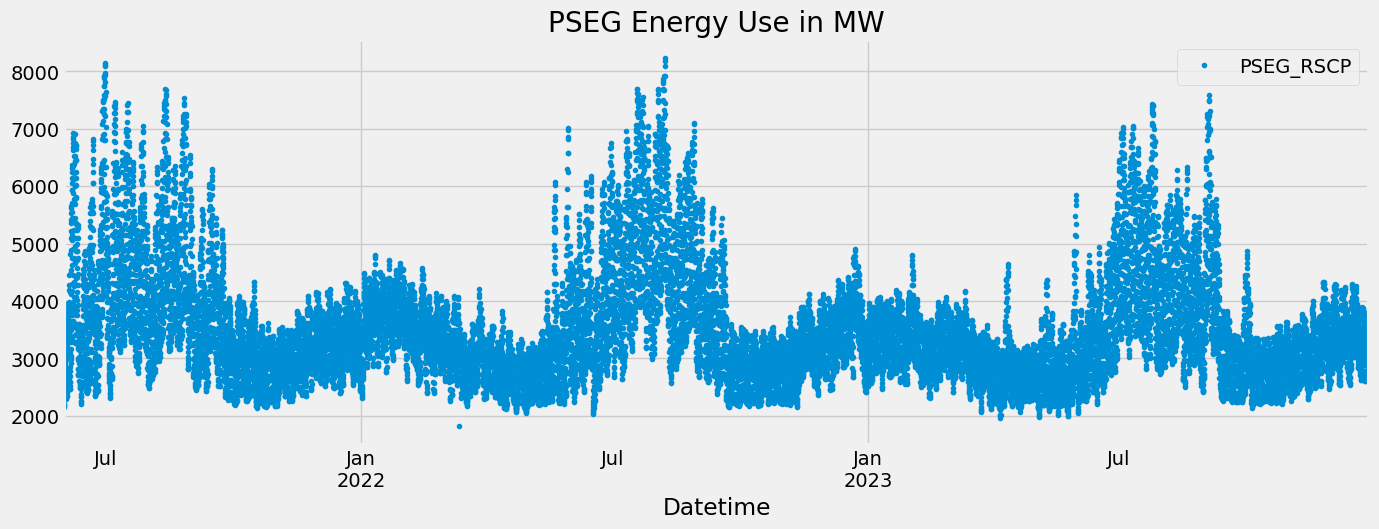

In [ ]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PSEG Energy Use in MW')
plt.show()

<ipython-input-106-a70f34310d9b>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  datetime_range = pd.date_range(start=start_datetime, periods=len(df), freq='H')


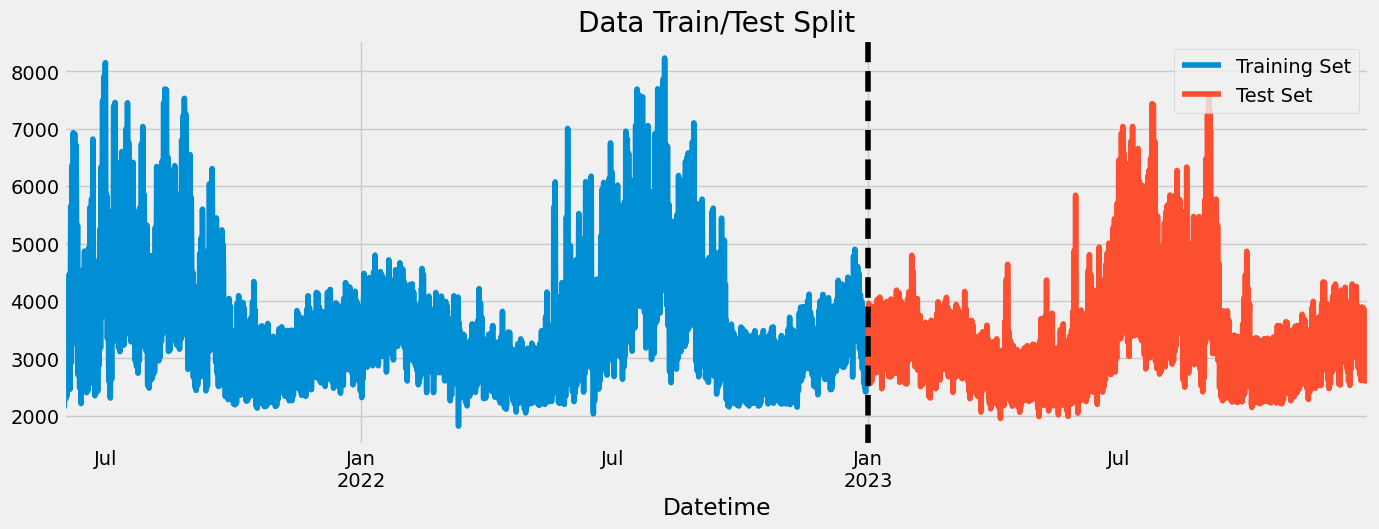

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate datetime column based on number of rows
start_datetime = "2021-06-01 01:00:00"
datetime_range = pd.date_range(start=start_datetime, periods=len(df), freq='H')

# Step 2: Add the 'Datetime' column to the DataFrame
df['Datetime'] = datetime_range

# Step 3: Split the data based on the 'Datetime' column
train = df.loc[df['Datetime'] < '2023-01-01']
test = df.loc[df['Datetime'] >= '2023-01-01']

# Step 4: Create plot
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(x='Datetime', y='PSEG_RSCP', ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(x='Datetime', y='PSEG_RSCP', ax=ax, label='Test Set')
ax.axvline(pd.to_datetime('2023-01-01'), color='black', ls='--')  # Mark the split point
ax.legend(['Training Set', 'Test Set'])
plt.show()


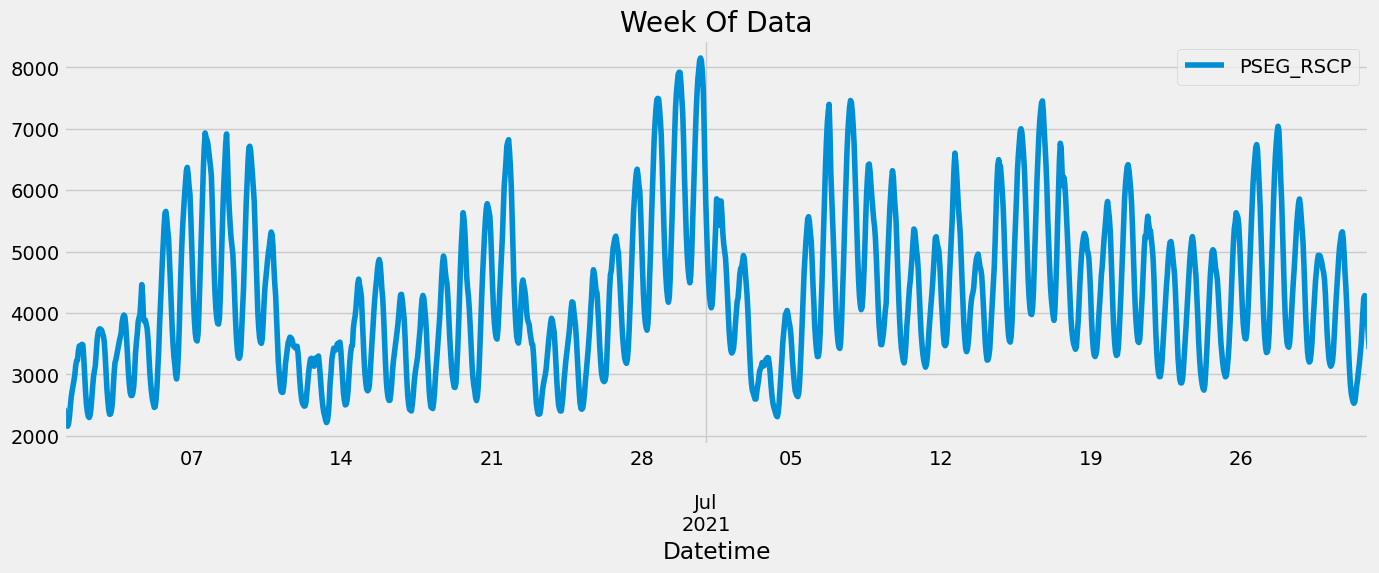

In [ ]:
df.loc[(df['Datetime'] > '2021-06-01') & (df['Datetime'] < '2021-08-01')] \
    .plot(x='Datetime', y='PSEG_RSCP', figsize=(15, 5), title='Week Of Data')
plt.show()


In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

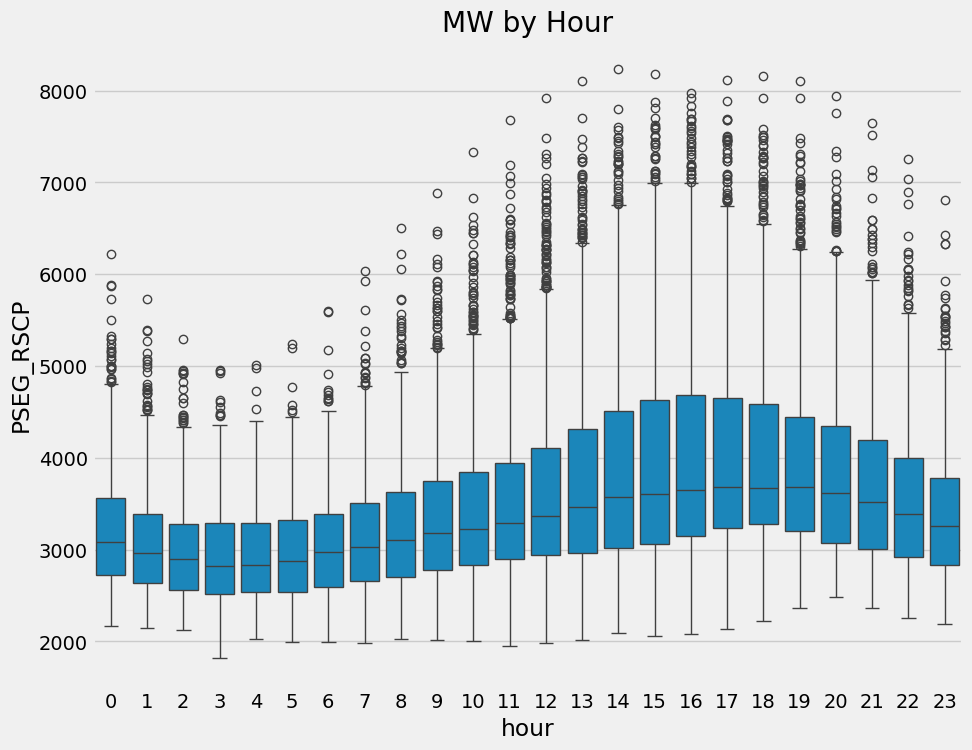

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PSEG_RSCP')
ax.set_title('MW by Hour')
plt.show()


<ipython-input-110-6a11b3776472>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PSEG_RSCP', palette='Blues')


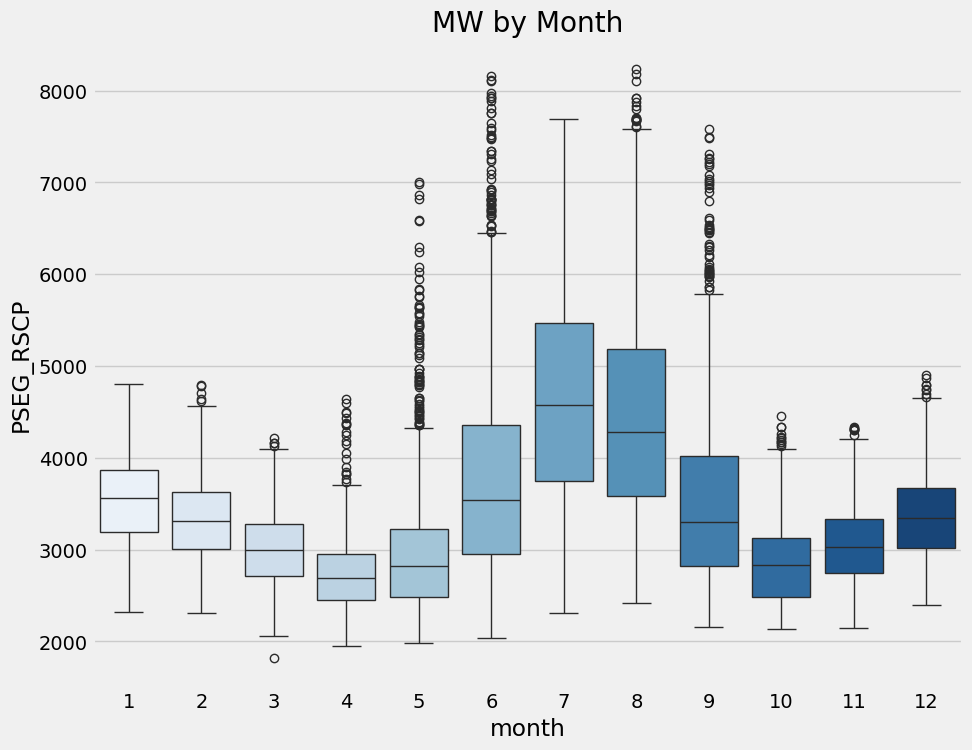

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PSEG_RSCP', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PSEG_RSCP'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:3692.98239	validation_1-rmse:3419.51478


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:47:37] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:1485.11706	validation_1-rmse:1269.97815
[200]	validation_0-rmse:784.11793	validation_1-rmse:653.41343
[300]	validation_0-rmse:607.85527	validation_1-rmse:576.37867
[346]	validation_0-rmse:580.09490	validation_1-rmse:581.74255


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

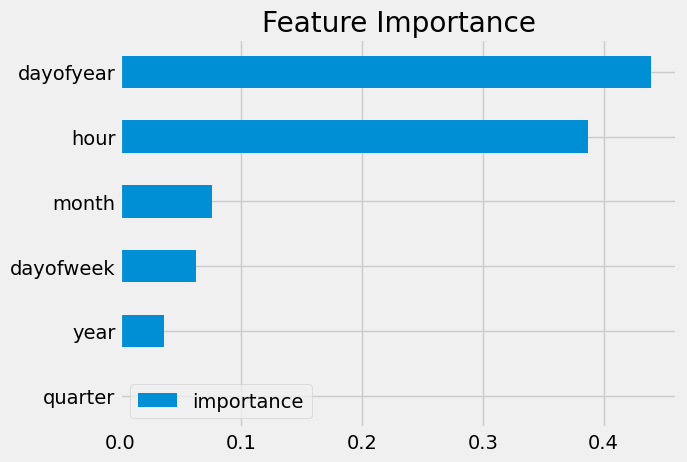

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

In [ ]:
print(PSEG_RSCP_df.columns)
print(weather_dateCategories_newark_2020_2023.columns)


Index(['PSEG_RSCP'], dtype='object')
Index(['Temperature', 'Pressure', 'Dew Point', 'Humidity', 'Wind Speed',
       'Weekday'],
      dtype='object')


In [ ]:
print(weather_dateCategories_newark_2020_2023_training.dtypes)


Temperature    float64
Pressure       float64
Dew Point      float64
Humidity       float64
Wind Speed     float64
Weekday          int64
dtype: object


In [ ]:
print(weather_dateCategories_newark_2020_2023_training.shape)
print(PSEG_training.shape)


(15115, 6)
(15115, 2)


In [ ]:
print(weather_dateCategories_newark_2020_2023_training.isnull().sum())
print(PSEG_training.isnull().sum())
print(np.isinf(weather_dateCategories_newark_2020_2023_training).sum())
weather_dateCategories_newark_2020_2023_training.fillna(0, inplace=True)
weather_dateCategories_newark_2020_2023_training.replace([np.inf, -np.inf], 0, inplace=True)


Temperature    0
Pressure       0
Dew Point      0
Humidity       0
Wind Speed     0
Weekday        0
dtype: int64
index    0
0        0
dtype: int64
Temperature    0
Pressure       0
Dew Point      0
Humidity       0
Wind Speed     0
Weekday        0
dtype: int64


In [ ]:
print(PSEG_training.shape)
print(PSEG_training.head())


(15115, 2)
                    index     0
5925  2022-02-02 22:00:00  3722
11635 2022-09-28 20:00:00  3423
12432 2022-11-01 01:00:00  2473
4400  2021-12-01 09:00:00  3501
5374  2022-01-10 23:00:00  3955


In [ ]:
# Extract the target column
PSEG_training = PSEG_training.iloc[:, 1]  # Select the second column (replace with column name if using named columns)

# Confirm the shape
print(PSEG_training.shape)

# Apply LabelEncoder only if labels are non-numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
PSEG_training = le.fit_transform(PSEG_training)

(15115,)


In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09, max_depth = 6, verbosity = -1, random_state = 1)
model.fit(weather_dateCategories_newark_2020_2023_training, PSEG_training)

LGBMClassifier(learning_rate=0.09, max_depth=6, random_state=1, verbosity=-1)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

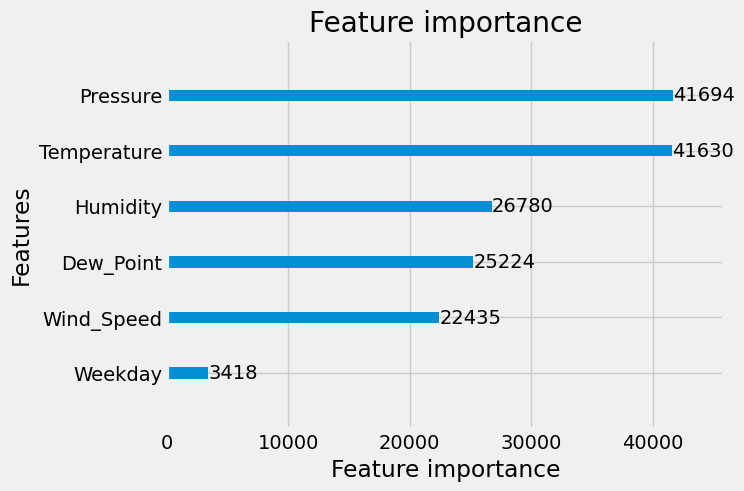

In [ ]:
lgb.plot_importance(model)
